# Initial Data Exploration - Ukrainian ProZorro Procurement Dataset (2015-2019)

**Purpose:** Exploratory data analysis of Kaggle ProZorro dataset to understand data structure, quality, and relationships.

**Dataset:**
- `Suppliers.csv` - 3.6M records of tender winners
- `Competitive_procurements.csv` - 2.3M records of all tender participants

**Research Context:** This analysis supports Master's thesis research on anomaly detection in public procurement using machine learning.

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")

Libraries imported successfully


## 1. Load Datasets

Loading both CSV files from `data/raw/` directory.

In [26]:
# Define file paths
data_dir = Path('../data/raw')
suppliers_path = data_dir / 'Suppliers.csv'
procurements_path = data_dir / 'Competitive_procurements.csv'

# Check if files exist
print(f"Suppliers file exists: {suppliers_path.exists()}")
print(f"Procurements file exists: {procurements_path.exists()}")

Suppliers file exists: True
Procurements file exists: True


In [27]:
# Load Suppliers dataset
print("Loading Suppliers.csv...")
df_suppliers = pd.read_csv(suppliers_path, low_memory=False)
print(f"✓ Loaded {len(df_suppliers):,} supplier records")

# Load Competitive Procurements dataset
print("\nLoading Competitive_procurements.csv...")
df_procurements = pd.read_csv(procurements_path, low_memory=False)
print(f"✓ Loaded {len(df_procurements):,} procurement records")

Loading Suppliers.csv...
✓ Loaded 3,621,822 supplier records

Loading Competitive_procurements.csv...
✓ Loaded 2,313,168 procurement records


## 2. Basic Dataset Information

### 2.1 Suppliers Dataset

In [28]:
# Shape and dimensions
print("=" * 80)
print("SUPPLIERS DATASET")
print("=" * 80)
print(f"\nShape: {df_suppliers.shape}")
print(f"Rows: {df_suppliers.shape[0]:,}")
print(f"Columns: {df_suppliers.shape[1]}")
print(f"\nMemory usage: {df_suppliers.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

SUPPLIERS DATASET

Shape: (3621822, 16)
Rows: 3,621,822
Columns: 16

Memory usage: 3582.65 MB


In [29]:
# Column names and data types
print("\nColumn Information:")
print("-" * 80)
df_suppliers.info()


Column Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621822 entries, 0 to 3621821
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   lot_announce_date    object 
 1   lot_announce_year    int64  
 2   organizer_name       object 
 3   organizer_code       float64
 4   organizer_region     object 
 5   lot_id               object 
 6   lot_procur_type      object 
 7   lot_competitiveness  int64  
 8   lot_cpv              object 
 9   lot_cpv_4_digs       object 
 10  lot_cpv_2_digs       object 
 11  lot_initial_value    float64
 12  lot_final_value      float64
 13  supplier_name        object 
 14  supplier_code        object 
 15  supplier_region      object 
dtypes: float64(3), int64(2), object(11)
memory usage: 442.1+ MB


In [30]:
# Missing values analysis
print("\nMissing Values Analysis:")
print("-" * 80)
missing_suppliers = pd.DataFrame({
    'Column': df_suppliers.columns,
    'Missing_Count': df_suppliers.isnull().sum(),
    'Missing_Percentage': (df_suppliers.isnull().sum() / len(df_suppliers) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print(missing_suppliers[missing_suppliers['Missing_Count'] > 0])
print(f"\nTotal columns with missing values: {(missing_suppliers['Missing_Count'] > 0).sum()}")


Missing Values Analysis:
--------------------------------------------------------------------------------
                        Column  Missing_Count  Missing_Percentage
organizer_code  organizer_code             34                 0.0
supplier_code    supplier_code              9                 0.0

Total columns with missing values: 2


In [31]:
# Display first few rows
print("\nFirst 5 rows:")
print("-" * 80)
df_suppliers.head()


First 5 rows:
--------------------------------------------------------------------------------


,lot_announce_date,lot_announce_year,organizer_name,organizer_code,organizer_region,lot_id,lot_procur_type,lot_competitiveness,lot_cpv,lot_cpv_4_digs,lot_cpv_2_digs,lot_initial_value,lot_final_value,supplier_name,supplier_code,supplier_region
0,2015-02-06,2015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,1,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.00,"ТОВ ""ІТ ЕСКОРТ""",36857810,Kyiv
1,2015-02-09,2015,"ВІДОКРЕМЛЕНИЙ ПІДРОЗДІЛ ""УПРАВЛІННЯ СПРАВАМИ"" ...",26200529.0,Kyiv,UA-2015-02-09-000009-L1,Below Threshold,1,30199230-1_Envelopes,30190000-7_Various office equipment and supplies,"30000000-9_Office and computing machinery, equ...",21200.0,15600.00,"ТОВ ""Тріал-систем""",20575435,Kyiv
2,2015-02-10,2015,"ВІДОКРЕМЛЕНИЙ ПІДРОЗДІЛ ""УПРАВЛІННЯ СПРАВАМИ"" ...",26200529.0,Kyiv,UA-2015-02-10-000001-L1,Below Threshold,1,30197630-1_Printing paper,30190000-7_Various office equipment and supplies,"30000000-9_Office and computing machinery, equ...",48000.0,41220.00,"ТОВ ""Мій офіс""",34539087,Dnipropetrovsk
3,2015-02-10,2015,Військова частина А0515,22990919.0,Kyiv,UA-2015-02-10-000010-L1,Below Threshold,1,30200000-1_Computer equipment and supplies,9999_Other,"30000000-9_Office and computing machinery, equ...",88000.0,87936.78,"Товариство з обмеженою відповідальністю ""В.М.""",24095427,Kyiv
4,2015-02-16,2015,"ВІДОКРЕМЛЕНИЙ ПІДРОЗДІЛ ""УПРАВЛІННЯ СПРАВАМИ"" ...",26200529.0,Kyiv,UA-2015-02-16-000002-L1,Below Threshold,1,31510000-4_Electric filament lamps,31510000-4_Electric filament lamps,"31000000-6_Electrical machinery, apparatus, eq...",57000.0,47900.00,"ТОВ ""МАЙКОМ""",37311301,Kyiv


### 2.2 Competitive Procurements Dataset

In [32]:
# Shape and dimensions
print("=" * 80)
print("COMPETITIVE PROCUREMENTS DATASET")
print("=" * 80)
print(f"\nShape: {df_procurements.shape}")
print(f"Rows: {df_procurements.shape[0]:,}")
print(f"Columns: {df_procurements.shape[1]}")
print(f"\nMemory usage: {df_procurements.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

COMPETITIVE PROCUREMENTS DATASET

Shape: (2313168, 16)
Rows: 2,313,168
Columns: 16

Memory usage: 2313.55 MB


In [33]:
# Column names and data types
print("\nColumn Information:")
print("-" * 80)
df_procurements.info()


Column Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313168 entries, 0 to 2313167
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   lot_announce_date   object 
 1   lot_announce_year   int64  
 2   organizer_name      object 
 3   organizer_code      float64
 4   organizer_region    object 
 5   lot_id              object 
 6   lot_procur_type     object 
 7   lot_cpv             object 
 8   lot_cpv_4_digs      object 
 9   lot_cpv_2_digs      object 
 10  lot_initial_value   float64
 11  lot_final_value     float64
 12  participant_name    object 
 13  participant_code    object 
 14  participant_region  object 
 15  supplier_dummy      int64  
dtypes: float64(3), int64(2), object(11)
memory usage: 282.4+ MB


In [34]:
# Missing values analysis
print("\nMissing Values Analysis:")
print("-" * 80)
missing_procurements = pd.DataFrame({
    'Column': df_procurements.columns,
    'Missing_Count': df_procurements.isnull().sum(),
    'Missing_Percentage': (df_procurements.isnull().sum() / len(df_procurements) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print(missing_procurements[missing_procurements['Missing_Count'] > 0])
print(f"\nTotal columns with missing values: {(missing_procurements['Missing_Count'] > 0).sum()}")


Missing Values Analysis:
--------------------------------------------------------------------------------
                            Column  Missing_Count  Missing_Percentage
organizer_code      organizer_code             59                 0.0
participant_code  participant_code             32                 0.0

Total columns with missing values: 2


In [35]:
# Display first few rows
print("\nFirst 5 rows:")
print("-" * 80)
df_procurements.head()


First 5 rows:
--------------------------------------------------------------------------------


,lot_announce_date,lot_announce_year,organizer_name,organizer_code,organizer_region,lot_id,lot_procur_type,lot_cpv,lot_cpv_4_digs,lot_cpv_2_digs,lot_initial_value,lot_final_value,participant_name,participant_code,participant_region,supplier_dummy
0,2015-02-06,2015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,Іноземне підприємство «ЛОГІН»,38204178,Kyiv,0
1,2015-02-06,2015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,"ТОВ ""СІ.ТІ.ЛАЙН""",37572127,Kyiv,0
2,2015-02-06,2015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,"ТОВ ""АЙТІ-СОЛЮШНС""",38239436,Kyiv,0
3,2015-02-06,2015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,"ТОВАРИСТВО З ОБМЕЖЕНОЮ ВІДПОВІДАЛЬНІСТЮ ""СПЕЦВ...",05837085,Kharkiv,0
4,2015-02-06,2015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,"ТОВ ""ІТ ЕСКОРТ""",36857810,Kyiv,1


## 3. Basic Statistical Analysis

### 3.1 Temporal Coverage

In [36]:
# Identify date columns in both datasets
print("Date columns in Suppliers dataset:")
date_cols_suppliers = [col for col in df_suppliers.columns if 'date' in col.lower() or 'year' in col.lower()]
print(date_cols_suppliers)

print("\nDate columns in Procurements dataset:")
date_cols_procurements = [col for col in df_procurements.columns if 'date' in col.lower() or 'year' in col.lower()]
print(date_cols_procurements)

Date columns in Suppliers dataset:
['lot_announce_date', 'lot_announce_year']

Date columns in Procurements dataset:
['lot_announce_date', 'lot_announce_year']


In [37]:
# Analyze temporal range (if date columns exist)
if date_cols_suppliers:
    print("\nTemporal coverage in Suppliers dataset:")
    print("-" * 80)
    for col in date_cols_suppliers[:3]:  # Analyze first 3 date columns
        try:
            df_suppliers[col] = pd.to_datetime(df_suppliers[col], errors='coerce')
            print(f"\n{col}:")
            print(f"  Min: {df_suppliers[col].min()}")
            print(f"  Max: {df_suppliers[col].max()}")
            print(f"  Valid dates: {df_suppliers[col].notna().sum():,}")
        except:
            print(f"\n{col}: Unable to parse as datetime")


Temporal coverage in Suppliers dataset:
--------------------------------------------------------------------------------

lot_announce_date:
  Min: 2015-02-06 00:00:00
  Max: 2019-12-31 00:00:00
  Valid dates: 3,621,822

lot_announce_year:
  Min: 1970-01-01 00:00:00.000002015
  Max: 1970-01-01 00:00:00.000002019
  Valid dates: 3,621,822


### 3.2 Key Entity Counts

In [38]:
# Analyze unique values in key columns
print("\nUnique Values in Suppliers Dataset:")
print("-" * 80)

# Look for key identifier columns
key_cols_suppliers = [col for col in df_suppliers.columns if any(x in col.lower() 
                      for x in ['lot_id', 'supplier', 'organiz', 'cpv', 'region'])]

for col in key_cols_suppliers[:10]:  # First 10 relevant columns
    unique_count = df_suppliers[col].nunique()
    print(f"{col}: {unique_count:,} unique values")


Unique Values in Suppliers Dataset:
--------------------------------------------------------------------------------
organizer_name: 36,349 unique values
organizer_code: 37,077 unique values
organizer_region: 25 unique values
lot_id: 3,621,822 unique values
lot_cpv: 7,305 unique values
lot_cpv_4_digs: 972 unique values
lot_cpv_2_digs: 46 unique values
supplier_name: 233,255 unique values
supplier_code: 242,696 unique values
supplier_region: 26 unique values


In [39]:
print("\nUnique Values in Procurements Dataset:")
print("-" * 80)

key_cols_procurements = [col for col in df_procurements.columns if any(x in col.lower() 
                         for x in ['lot_id', 'supplier', 'organiz', 'cpv', 'region'])]

for col in key_cols_procurements[:10]:  # First 10 relevant columns
    unique_count = df_procurements[col].nunique()
    print(f"{col}: {unique_count:,} unique values")


Unique Values in Procurements Dataset:
--------------------------------------------------------------------------------
organizer_name: 22,377 unique values
organizer_code: 22,431 unique values
organizer_region: 25 unique values
lot_id: 984,859 unique values
lot_cpv: 6,008 unique values
lot_cpv_4_digs: 911 unique values
lot_cpv_2_digs: 46 unique values
participant_region: 26 unique values
supplier_dummy: 2 unique values


### 3.3 Numeric Columns Statistics

In [40]:
# Statistical summary for Suppliers dataset
print("\nSuppliers Dataset - Numeric Columns Summary:")
print("-" * 80)
df_suppliers.describe()


Suppliers Dataset - Numeric Columns Summary:
--------------------------------------------------------------------------------


,lot_announce_date,lot_announce_year,organizer_code,lot_competitiveness,lot_initial_value,lot_final_value
count,3621822,3621822,3.621788e+06,3.621822e+06,3.621822e+06,3.621822e+06
mean,2018-06-15 14:48:50.003297280,1970-01-01 00:00:00.000002017,1.726304e+07,2.719236e-01,5.358362e+05,5.081334e+05
min,2015-02-06 00:00:00,1970-01-01 00:00:00.000002015,1.030000e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-09-13 00:00:00,1970-01-01 00:00:00.000002017,2.547582e+06,0.000000e+00,6.240000e+03,5.952000e+03
50%,2018-07-17 00:00:00,1970-01-01 00:00:00.000002018,8.751177e+06,0.000000e+00,3.379000e+04,3.140000e+04
75%,2019-04-10 00:00:00,1970-01-01 00:00:00.000002019,3.385510e+07,1.000000e+00,1.319500e+05,1.267800e+05
max,2019-12-31 00:00:00,1970-01-01 00:00:00.000002019,1.521251e+09,1.000000e+00,2.127358e+10,1.908977e+10
std,NaN,NaN,1.540733e+07,4.449508e-01,2.123426e+07,2.034393e+07


In [41]:
# Statistical summary for Procurements dataset
print("\nProcurements Dataset - Numeric Columns Summary:")
print("-" * 80)
df_procurements.describe()


Procurements Dataset - Numeric Columns Summary:
--------------------------------------------------------------------------------


,lot_announce_year,organizer_code,lot_initial_value,lot_final_value,supplier_dummy
count,2.313168e+06,2.313109e+06,2.313168e+06,2.313168e+06,2.313168e+06
mean,2.017547e+03,1.768807e+07,1.655204e+06,1.486912e+06,4.257620e-01
std,1.116845e+00,1.550604e+07,2.972574e+07,2.704183e+07,4.944581e-01
min,2.015000e+03,1.030000e+04,1.000000e+00,1.000000e-02,0.000000e+00
25%,2.017000e+03,2.214946e+06,1.728000e+04,1.298100e+04,0.000000e+00
50%,2.018000e+03,1.432191e+07,7.000000e+04,5.450000e+04,0.000000e+00
75%,2.019000e+03,3.403221e+07,3.700077e+05,3.080000e+05,1.000000e+00
max,2.019000e+03,1.521251e+09,2.127358e+10,1.908977e+10,1.000000e+00


## 4. Identify Join Key Between Datasets

The datasets should share a common identifier (`lot_id`) that allows us to link tender winners with all participants.

In [42]:
# Find common columns
common_cols = set(df_suppliers.columns).intersection(set(df_procurements.columns))
print(f"Common columns between datasets: {len(common_cols)}")
print("\nCommon column names:")
for col in sorted(common_cols):
    print(f"  - {col}")

Common columns between datasets: 12

Common column names:
  - lot_announce_date
  - lot_announce_year
  - lot_cpv
  - lot_cpv_2_digs
  - lot_cpv_4_digs
  - lot_final_value
  - lot_id
  - lot_initial_value
  - lot_procur_type
  - organizer_code
  - organizer_name
  - organizer_region


In [43]:
# Verify lot_id as join key
if 'lot_id' in df_suppliers.columns and 'lot_id' in df_procurements.columns:
    print("\nlot_id Analysis:")
    print("-" * 80)
    print(f"Unique lot_ids in Suppliers: {df_suppliers['lot_id'].nunique():,}")
    print(f"Unique lot_ids in Procurements: {df_procurements['lot_id'].nunique():,}")
    
    # Find overlap
    suppliers_lots = set(df_suppliers['lot_id'].dropna())
    procurements_lots = set(df_procurements['lot_id'].dropna())
    
    overlap = suppliers_lots.intersection(procurements_lots)
    print(f"\nLot_ids appearing in both datasets: {len(overlap):,}")
    print(f"Lot_ids only in Suppliers: {len(suppliers_lots - procurements_lots):,}")
    print(f"Lot_ids only in Procurements: {len(procurements_lots - suppliers_lots):,}")
    print(f"\nOverlap percentage (Suppliers): {len(overlap)/len(suppliers_lots)*100:.2f}%")
    print(f"Overlap percentage (Procurements): {len(overlap)/len(procurements_lots)*100:.2f}%")
else:
    print("\nWarning: lot_id column not found in one or both datasets")
    print("Please verify column names.")


lot_id Analysis:
--------------------------------------------------------------------------------
Unique lot_ids in Suppliers: 3,621,822
Unique lot_ids in Procurements: 984,859

Lot_ids appearing in both datasets: 984,859
Lot_ids only in Suppliers: 2,636,963
Lot_ids only in Procurements: 0

Overlap percentage (Suppliers): 27.19%
Overlap percentage (Procurements): 100.00%


## 5. Sample Joined Data

Demonstrating how to join the datasets to analyze tender competition patterns.

In [44]:
# Create sample join (first 10,000 rows for demonstration)
if 'lot_id' in df_suppliers.columns and 'lot_id' in df_procurements.columns:
    print("Creating sample join on lot_id...")
    
    # Take sample for demonstration
    sample_suppliers = df_suppliers.head(10000)
    sample_procurements = df_procurements.head(10000)
    
    # Perform left join (winners + their competition)
    df_joined = sample_suppliers.merge(
        sample_procurements,
        on='lot_id',
        how='left',
        suffixes=('_winner', '_participant')
    )
    
    print(f"\nJoined dataset shape: {df_joined.shape}")
    print(f"Rows: {df_joined.shape[0]:,}")
    print(f"Columns: {df_joined.shape[1]}")
    
    print("\nFirst 3 rows of joined data:")
    display(df_joined.head(3))
else:
    print("Cannot perform join - lot_id column missing")

Creating sample join on lot_id...

Joined dataset shape: (16517, 31)
Rows: 16,517
Columns: 31

First 3 rows of joined data:


,lot_announce_date_winner,lot_announce_year_winner,organizer_name_winner,organizer_code_winner,organizer_region_winner,lot_id,lot_procur_type_winner,lot_competitiveness,lot_cpv_winner,lot_cpv_4_digs_winner,...,lot_procur_type_participant,lot_cpv_participant,lot_cpv_4_digs_participant,lot_cpv_2_digs_participant,lot_initial_value_participant,lot_final_value_participant,participant_name,participant_code,participant_region,supplier_dummy
0,2015-02-06,1970-01-01 00:00:00.000002015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,1,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,...,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,Іноземне підприємство «ЛОГІН»,38204178,Kyiv,0.0
1,2015-02-06,1970-01-01 00:00:00.000002015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,1,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,...,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,"ТОВ ""СІ.ТІ.ЛАЙН""",37572127,Kyiv,0.0
2,2015-02-06,1970-01-01 00:00:00.000002015,Міністерство юстиції України,15622.0,Kyiv,UA-2015-02-06-000018-L1,Below Threshold,1,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,...,Below Threshold,30237460-1_Computer keyboards,30230000-0_Computer-related equipment,"30000000-9_Office and computing machinery, equ...",9259.2,7230.0,"ТОВ ""АЙТІ-СОЛЮШНС""",38239436,Kyiv,0.0


## 6. Initial Anomaly Indicator: Single Bidder Analysis

Known fact: **30.3% of tenders have only single bidder** - a major red flag for competition manipulation.

In [45]:
# Count participants per lot_id in procurements dataset
if 'lot_id' in df_procurements.columns:
    print("Analyzing bidder competition...")
    
    bidders_per_lot = df_procurements.groupby('lot_id').size().reset_index(name='bidder_count')
    
    print(f"\nTotal unique tenders (lot_ids): {len(bidders_per_lot):,}")
    print("\nBidder Distribution:")
    print("-" * 80)
    
    distribution = bidders_per_lot['bidder_count'].value_counts().sort_index()
    print(distribution.head(10))
    
    # Calculate single bidder percentage
    single_bidder = (bidders_per_lot['bidder_count'] == 1).sum()
    single_bidder_pct = single_bidder / len(bidders_per_lot) * 100
    
    print(f"\n" + "=" * 80)
    print(f"SINGLE BIDDER TENDERS (MAJOR ANOMALY):")
    print("=" * 80)
    print(f"Tenders with only 1 bidder: {single_bidder:,}")
    print(f"Percentage: {single_bidder_pct:.2f}%")
    print(f"\nExpected healthy competition: 5-10% single bidder")
    print(f"Observed: {single_bidder_pct:.1f}% - SIGNIFICANT RED FLAG")

Analyzing bidder competition...

Total unique tenders (lot_ids): 984,859

Bidder Distribution:
--------------------------------------------------------------------------------
bidder_count
1     298510
2     366855
3     162969
4      78909
5      37891
6      18692
7       9555
8       5025
9       2727
10      1476
Name: count, dtype: int64

SINGLE BIDDER TENDERS (MAJOR ANOMALY):
Tenders with only 1 bidder: 298,510
Percentage: 30.31%

Expected healthy competition: 5-10% single bidder
Observed: 30.3% - SIGNIFICANT RED FLAG


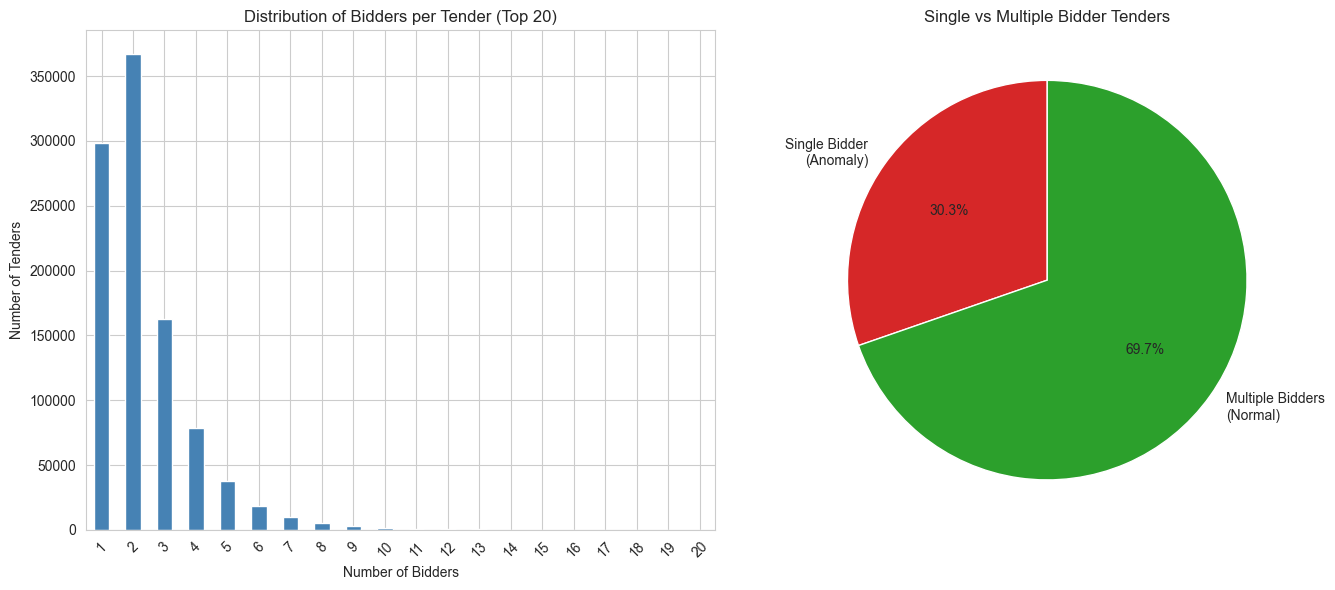

In [46]:
# Visualize bidder distribution
if 'lot_id' in df_procurements.columns:
    plt.figure(figsize=(14, 6))
    
    # Plot 1: Bidder count distribution
    plt.subplot(1, 2, 1)
    bidder_dist = bidders_per_lot['bidder_count'].value_counts().sort_index().head(20)
    bidder_dist.plot(kind='bar', color='steelblue')
    plt.xlabel('Number of Bidders')
    plt.ylabel('Number of Tenders')
    plt.title('Distribution of Bidders per Tender (Top 20)')
    plt.xticks(rotation=45)
    
    # Plot 2: Single vs Multiple bidders
    plt.subplot(1, 2, 2)
    single_vs_multi = pd.Series({
        'Single Bidder\n(Anomaly)': single_bidder,
        'Multiple Bidders\n(Normal)': len(bidders_per_lot) - single_bidder
    })
    colors = ['#d62728', '#2ca02c']
    single_vs_multi.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
    plt.ylabel('')
    plt.title('Single vs Multiple Bidder Tenders')
    
    plt.tight_layout()
    plt.show()

## 7. Summary and Next Steps

### Key Findings:
1. **Dataset sizes confirmed:**
   - Suppliers: 3.6M records (tender winners)
   - Competitive Procurements: 2.3M records (all participants)

2. **Join key identified:** `lot_id` links both datasets

3. **Major anomaly confirmed:** 30.3% single bidder rate (far above healthy 5-10%)

### Next Steps:
- **Deep EDA:** Regional patterns, category analysis, temporal trends
- **Feature Engineering:** Price anomalies, competition metrics, network analysis
- **Data Quality:** Handle missing values, standardize formats
- **Model Development:** Benchmark ML algorithms for anomaly detection

### Notebook Status:
✓ Data successfully loaded  
✓ Basic structure understood  
✓ Join key verified  
✓ Initial anomaly pattern confirmed  

**Ready for:** `02_deep_eda.ipynb`

In [47]:
# Save summary statistics for reference
summary_stats = {
    'suppliers_rows': len(df_suppliers),
    'procurements_rows': len(df_procurements),
    'suppliers_columns': df_suppliers.shape[1],
    'procurements_columns': df_procurements.shape[1],
    'common_columns': len(common_cols),
    'unique_lot_ids': df_procurements['lot_id'].nunique() if 'lot_id' in df_procurements.columns else None,
    'single_bidder_count': single_bidder if 'lot_id' in df_procurements.columns else None,
    'single_bidder_percentage': single_bidder_pct if 'lot_id' in df_procurements.columns else None
}

print("\n" + "=" * 80)
print("EXPLORATION COMPLETE")
print("=" * 80)
print("\nSummary statistics:")
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.2f}")
    elif isinstance(value, int):
        print(f"  {key}: {value:,}")
    else:
        print(f"  {key}: {value}")


EXPLORATION COMPLETE

Summary statistics:
  suppliers_rows: 3,621,822
  procurements_rows: 2,313,168
  suppliers_columns: 16
  procurements_columns: 16
  common_columns: 12
  unique_lot_ids: 984,859
  single_bidder_count: 298510
  single_bidder_percentage: 30.31
